# Predicting Heart Disease - A Comprehensive Analysis and Model Building Report
### by Tendai Milicent Jonhasi

## Project Objectives

# 1. Introduction and Objectives

# Predicting Heart Disease

## Introduction
The goal of this project is to build a predictive model that can accurately classify individuals as either having or not having heart disease. By analyzing a comprehensive set of patient attributes, including demographic, clinical, and lifestyle factors, the model aims to identify patterns and features indicative of the presence or absence of heart disease.

## Objectives
1. Perform exploratory data analysis (EDA) to understand the data and the relationships between variables.
2. Preprocess the data, including handling missing values and scaling features.
3. Build multiple predictive models to classify individuals as having or not having heart disease.
4. Evaluate the models using appropriate metrics such as accuracy, precision, recall, and AUC-ROC.
5. Select the best-performing model and interpret its results.


# 2. Data Loading and Preprocessing


In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout





In [3]:
# Load the dataset
df = pd.read_csv('cardio_data.csv')

# Height is in centimeters, first convert it to meters
df['height_m'] = df['height'] / 100

# Calculate BMI
df['BMI'] = df['weight'] / (df['height_m'] ** 2)

# Define the simplified BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obesity'
    
# Apply the function to create a new column for simplified BMI categories
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Convert age from days to years
df['Age_in_Years'] = (df['age'] / 365.25).round()

# Display the first few rows of the dataset
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease,height_m,BMI,BMI_Category,Age_in_Years
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0,1.68,21.967120,Normal weight,50.0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1,1.56,34.927679,Obesity,55.0
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1,1.65,23.507805,Normal weight,52.0
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1,1.69,28.710479,Overweight,48.0
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0,1.56,23.011177,Normal weight,48.0


In [4]:
# Drop the `Height_m` column if not needed
df = df.drop(columns=['date', 'id','height_m', 'weight', 'height'])

# Display the first few rows of the dataset
df.head()

,country,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,occupation,smoke,disease,BMI,BMI_Category,Age_in_Years
0,Indonesia,1,18393,0,110,80,1,2,1,Architect,0,0,21.967120,Normal weight,50.0
1,Malaysia,1,20228,0,140,90,3,1,1,Accountant,0,1,34.927679,Obesity,55.0
2,Indonesia,0,18857,0,130,70,3,1,1,Chef,0,1,23.507805,Normal weight,52.0
3,Singapore,1,17623,0,150,100,1,2,1,Lawyer,0,1,28.710479,Overweight,48.0
4,Singapore,0,17474,0,100,60,1,1,1,Architect,0,0,23.011177,Normal weight,48.0


In [5]:
## Data Preprocessing

# Check for missing values
df.isnull().sum()

### Encoding Categorical Variables
#We will encode any categorical variables using one-hot encoding or label encoding as appropriate.

# Example of one-hot encoding
df = pd.get_dummies(df, drop_first=True)

### Feature Scaling
#Since many machine learning algorithms require features to be on the same scale, we will scale our features using StandardScaler.

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('disease', axis=1))

# Convert scaled features into a DataFrame
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['disease']


In [6]:
# Display the first few rows of the dataset
df.head()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,smoke,disease,...,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Nurse,occupation_Others,occupation_Teacher,BMI_Category_Obesity,BMI_Category_Overweight,BMI_Category_Underweight
0,1,18393,0,110,80,1,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,20228,0,140,90,3,1,1,0,1,...,False,False,False,False,False,False,False,True,False,False
2,0,18857,0,130,70,3,1,1,0,1,...,True,False,False,False,False,False,False,False,False,False
3,1,17623,0,150,100,1,2,1,0,1,...,False,False,False,True,False,False,False,False,True,False
4,0,17474,0,100,60,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False


# 3. Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)
We will explore the dataset to understand the distribution of the data, relationships between features, and key insights that could help in model building.

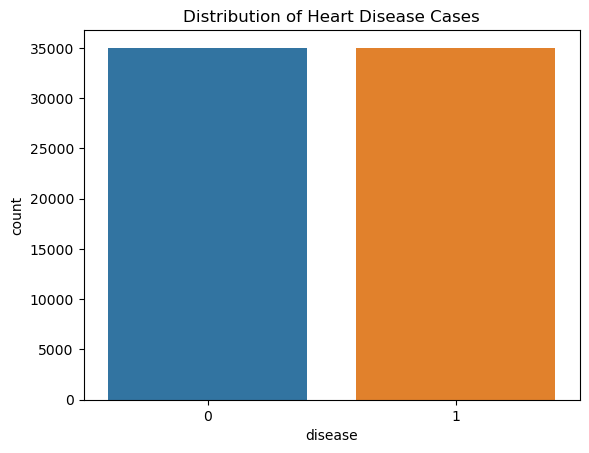

C:\Users\Remake\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Remake\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Remake\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Remake\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

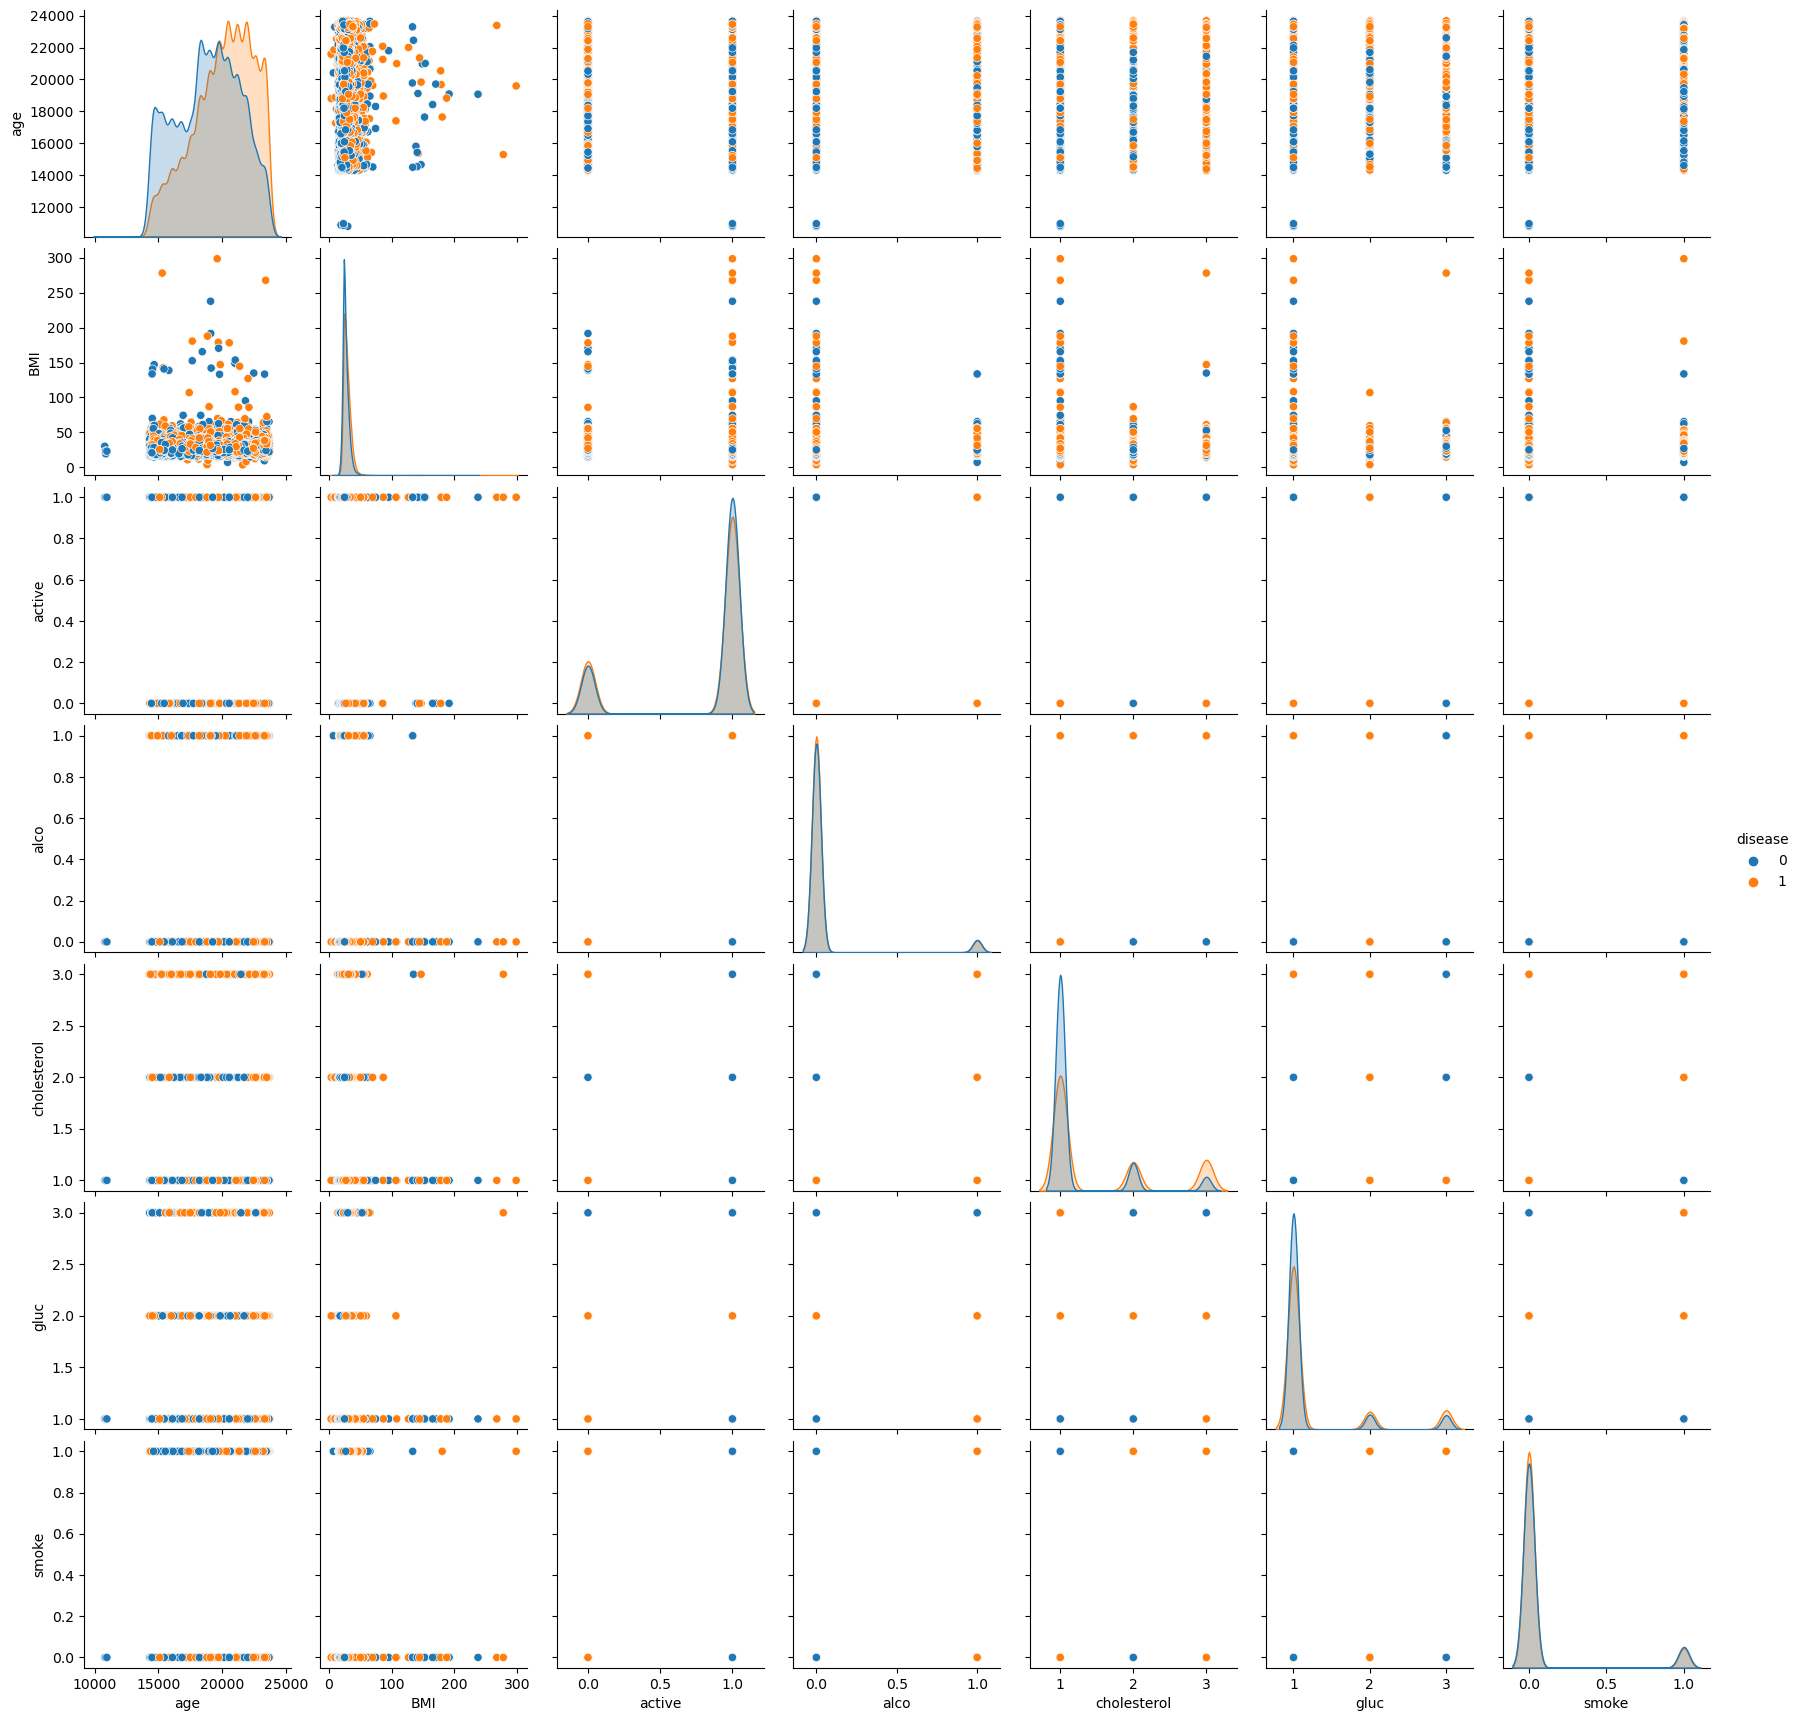

In [7]:
sns.countplot(x='disease', data=df)
plt.title('Distribution of Heart Disease Cases')
plt.show()

# Pairplot for selected features
sns.pairplot(df, hue='disease', vars=['age','BMI','active','alco', 'cholesterol','gluc','smoke'])
plt.show()


## Binary Classification

The target variable 'disease' shows that we have only two classes which the machine understands as 0 and 1.

1 — Will have heart disease.

0 — Does not have heart diseasen.

Binary Classification problems are more flexible and simple to manipulate as there are only 2 classes we need to fetch information
"""

## The Pair Plots 

The scatterplot matrix shows the relationships between several features in the dataset, with points color-coded by the presence (1) or absence (0) of heart disease.

### Key Observations:
**Diagonal Plots (Distributions):**

Each diagonal element shows the distribution of the individual features, separated by the disease variable.
For example, in the top-left plot, the age distribution shows some differences between patients with and without heart disease.


**Scatter Plots:**

The off-diagonal elements are scatter plots showing the relationship between pairs of features, with points colored by the disease label.
These plots help visualize how the features interact with each other and whether any patterns emerge that separate those with heart disease from those without.

* Age and Cholesterol:

There seems to be a slight differentiation in age between those with heart disease (in orange) and those without (in blue).
Cholesterol levels appear to have a noticeable difference between patients with and without heart disease, especially as cholesterol increases.

* Active, Alco, Gluc, and Smoke:

These binary features show clustering where patients with heart disease might tend to be more frequent in certain categories, though the spread is not very pronounced.


### Potential Insights:

Age and cholesterol might be more significant factors in determining heart disease, given the visible separation in their distributions.
Blood pressure could also be important to investigate, as it's a known risk factor.

This pair plot helps visually assess correlations and potential predictors of heart disease. It suggests that certain variables like age and cholesterol might be important in predicting heart disease, but further machine learning modeling will confirm this.ion.

# 4. Model Building

## Model Building
We will build several models including Logistic Regression, Random Forest, and Support Vector Machine and the Convolutional Neural Networks (CNNs). While CNNs are mostly used for image and video processing applications, let's give it a try to how it performs  (SVM) to classify the individuals as having or not having heart disease.

# 4.1. Logistic Regression



In [8]:
import statsmodels.api as sm

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the independent variables for the intercept term
X_train_const = sm.add_constant(X_train)

# Train the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Print the summary with p-values
print(result.summary())

# Make predictions on the test set
X_test_const = sm.add_constant(X_test)
y_pred1 = result.predict(X_test_const)
y_pred_class = [1 if x > 0.5 else 0 for x in y_pred1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_class))


Optimization terminated successfully.
         Current function value: 0.600074
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                disease   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48974
Method:                           MLE   Df Model:                           25
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.1343
Time:                        11:56:11   Log-Likelihood:                -29404.
converged:                       True   LL-Null:                       -33964.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0929      0.010      9.138      0.000       0.073   

Here are the results from the Logistic Regression model, highlighting the key features and their significance:

## Important Features and Their P-Values:

* Intercept (const): Coefficient = 0.0929, p-value < 0.001
* Age: Coefficient = 0.7062, p-value < 0.002
* Gender: Coefficient = 0.0361, p-value < 0.001
* Systolic Blood Pressure (ap_hi): Coefficient = 5.4252, p-value < 0.001
* Cholesterol: Coefficient = 0.3643, p-value < 0.001
* BMI_Category_Obesity: Coefficient = 0.0879, p-value < 0.001
* Glucose Level (gluc): Coefficient = -0.0622, p-value < 0.001
* Active: Coefficient = -0.0756, p-value < 0.001
* Alcohol Consumption (alco): Coefficient = -0.0445, p-value < 0.001
* Smoking (smoke): Coefficient = -0.0351, p-value < 0.002
* Diastolic Blood Pressure (ap_lo): Coefficient = 0.0499, p-value < 0.001
* Occupation_Teacher: Coefficient = 0.1465, p-value < 0.001


## Interpretation:

Age, Gender, Cholesterol, Blood Pressure (both systolic and diastolic), and Obesity are significant positive predictors of heart disease.
Being active, consuming alcohol, higher glucose levels, and smoking are significant negative predictors.

Glucose level has a negative coefficient, indicating that higher glucose levels are associated with a lower probability of heart disease in this model, which could be counterintuitive and might require further exploration.

Insignificant Features (p-value > 0.05):
Gender
Country (Indonesia, Malaysia, Singapore)
Occupation (Most occupation categories, except Lawyer which has a p-value just below 0.05)

These results suggest that while certain demographic features like country and occupation may not be significant predictors, physiological metrics like age, blood pressure, and cholesterol are highly significant in predicting heart disease. ​

**Model Accuracy**

The Logistic Regression model shows reasonable performance in predicting heart disease with an accuracy of about 71.8%.
Strengths: The model is particularly good at identifying non-heart disease cases (high recall for class 0). 76% but falls short for identifying heart disease cases (lower recall for class 1), at 68% which is critical in medical diagnostics where false negatives are costly.

**Key Influences**: Age, Cholesterol, Blood Pressure (both systolic and diastolic), and Weight are significant positive predictors of heart disease.
Being active, consuming alcohol, higher glucose levels, and smoking are significant negative predictors.

# 4.2 Random Forest Model

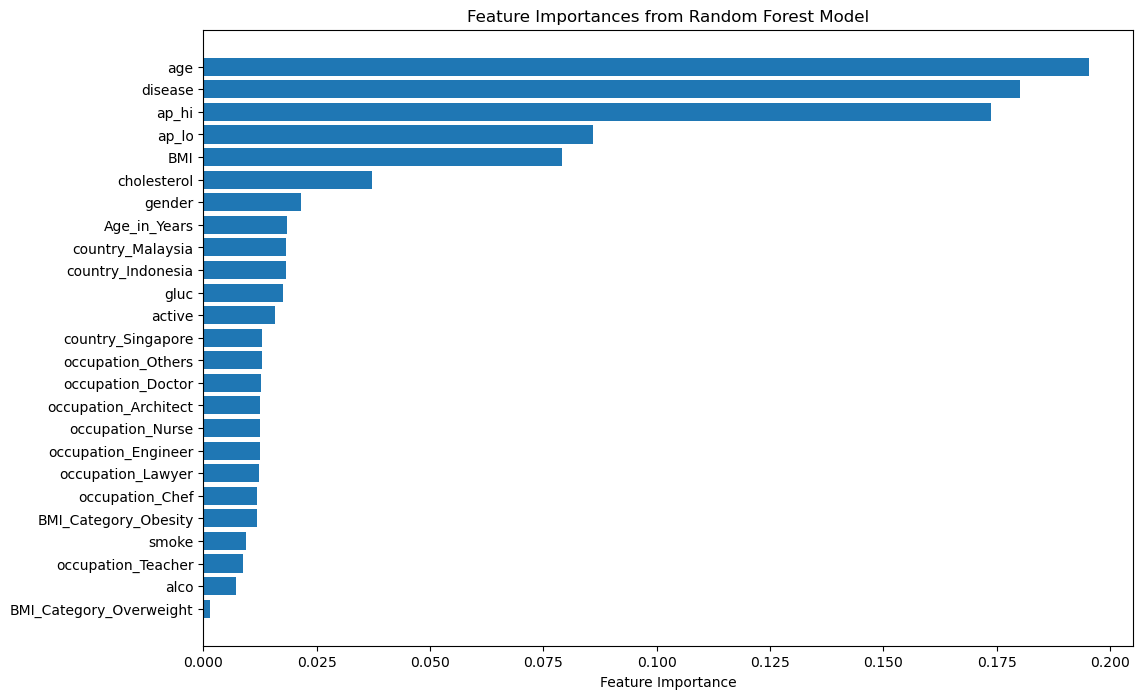

Accuracy Score: 0.7255238095238096
ROC AUC Score: 0.7839073544044086
Confusion Matrix:
 [[7777 2684]
 [3080 7459]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     10461
           1       0.74      0.71      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Predictions
y_pred2 = rfc.predict(X_test)

# Extracting feature importances
feature_importances = rfc.feature_importances_
# Assuming you have a list of feature names
feature_names = X.columns  # Use this if X is a DataFrame, otherwise provide feature names manually
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred2))
print("ROC AUC Score:", roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

## Feature Importances

**Age:** This is the most important feature according to the Random Forest model. Age is often a critical factor in heart disease, with older individuals generally being at higher risk.

**Systolic Blood Pressure (ap_hi):** The second most important feature. High systolic blood pressure is a significant risk factor for heart disease, as it indicates how much pressure your blood is exerting against artery walls when the heart beats.

**Weight:** Weight plays a crucial role as excess body weight is often associated with higher risk factors like hypertension, diabetes, and cholesterol levels, which contribute to heart disease.

**Height:** Although height is not directly related to heart disease, it could be associated with other factors like BMI (Body Mass Index) when combined with weight.

**Diastolic Blood Pressure (ap_lo):** This measures the pressure in your arteries when your heart rests between beats. While it's less impactful than systolic pressure, it's still important in assessing cardiovascular health.

**Cholesterol:** Elevated cholesterol levels can lead to the buildup of plaques in arteries, a condition known as atherosclerosis, which increases the risk of heart disease.

## Other Features
Gender, Glucose, and Occupation: These features have lower importance scores, meaning they contribute less to the model’s predictions. However, they still provide some predictive power. Gender, for example, is a known factor in heart disease risk, with men typically at higher risk at younger ages compared to women.

Country: The model might be capturing some region-specific variations in heart disease prevalence, but these features have relatively low importance.

**Model Accuracy**

The Random Forest model shows reasonable performance in predicting heart disease with an accuracy of about 72.5%.
Strengths: The model is particularly good at identifying non-heart disease cases (high recall for class 0). 75% and for identifying heart disease cases (lower recall for class 1), this is also high at 70% which is critical in medical diagnostics where false negatives are costly.

**Key Influences**: Age, Systolic Blood Pressure, Weight are the most influential factors in the model's decision-making process.


# 4.3 Support Vector Machine Model

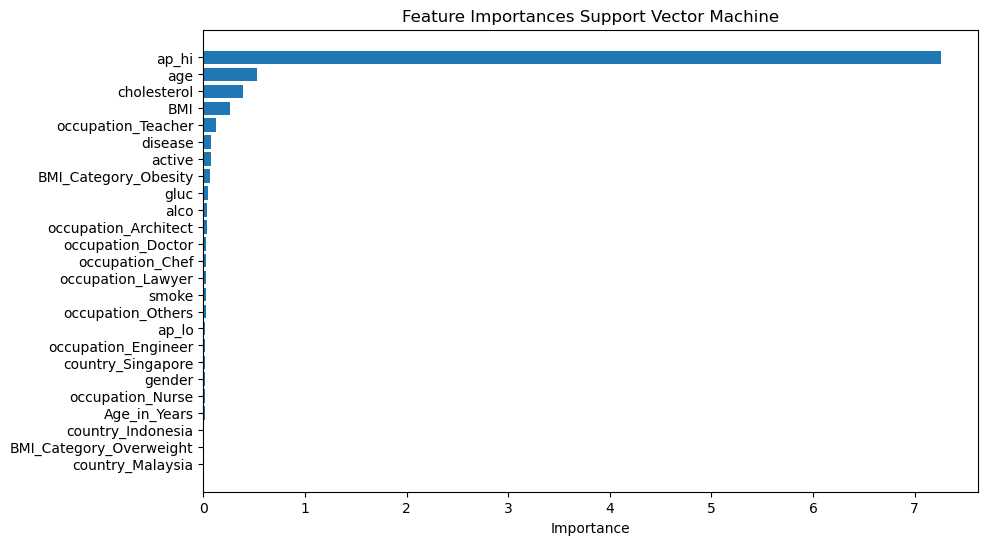


Confusion Matrix:
[[8441 2020]
 [3780 6759]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74     10461
           1       0.77      0.64      0.70     10539

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000


Accuracy Score:
0.7238095238095238


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def f_importances(coef, names):
    imp = np.abs(coef).flatten()  # Use absolute values of coefficients
    names = np.array(names)
    imp, names = zip(*sorted(zip(imp, names), reverse=False))
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xlabel('Importance')
    plt.title('Feature Importances Support Vector Machine')
    plt.show()

# Train the Support Vector Machine classifier with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Get feature importances
features_names = X.columns
f_importances(svm_model.coef_, features_names)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)



# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


## Feature Importances
The top features influencing the prediction are:
* ap_hi (Systolic blood pressure): This feature has the highest importance, suggesting it plays the most significant role in predicting heart disease.
* cholesterol: This is also a highly important feature.
* age: Another key factor.
* weight, height, active, gluc (Glucose levels): These have moderate importance.
Less important features include specific occupations, alcohol consumption (alco), smoking, and gender, among others.

**Model Accuracy**

The SVM model shows reasonable performance in predicting heart disease with an accuracy of about 72.5%.
Strengths: The model is particularly good at identifying non-heart disease cases (high recall for class 0).
Weaknesses: It struggles more with identifying heart disease cases (lower recall for class 1), which is critical in medical diagnostics where false negatives are costly.

**Key Influences**: Blood pressure, cholesterol, and age are the most influential factors in the model's decision-making process.ealth.

# 4.4 Convolutional Neural Networks (CNNs) 



In [11]:
# Reshape the data for CNN (adding a dimension)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Reshape again to make it 2D compatible for CNN (assuming the input is treated as a 1D image)
X_train_cnn = np.expand_dims(X_train_cnn, axis=-1)
X_test_cnn = np.expand_dims(X_test_cnn, axis=-1)

# Reshape the data for CNN (adding a channel dimension)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

# Adjust the input shape for 1D CNN
input_shape = (X_train_cnn.shape[1], 1)

# Build the CNN model
cnn_model = Sequential([
    Input(shape=input_shape),
    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=1)



Epoch 1/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6268 - loss: 0.6449 - val_accuracy: 0.6937 - val_loss: 0.5932
Epoch 2/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6920 - loss: 0.5946 - val_accuracy: 0.7252 - val_loss: 0.5613
Epoch 3/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7105 - loss: 0.5789 - val_accuracy: 0.7221 - val_loss: 0.5600
Epoch 4/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7198 - loss: 0.5673 - val_accuracy: 0.7288 - val_loss: 0.5533
Epoch 5/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7216 - loss: 0.5629 - val_accuracy: 0.7276 - val_loss: 0.5543
Epoch 6/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7254 - loss: 0.5594 - val_accuracy: 0.7310 - val_loss: 0.5508
Epoch 7/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7256 - loss: 0.5617 - val_accuracy: 0.7320 - val_loss: 0.5487
Epoch 8/10
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7215 - loss: 0.5604 - 

In [12]:
# Make predictions with CNN
y_pred_proba_cnn = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int)

# Evaluate CNN model
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
cnn_roc_auc = roc_auc_score(y_test, y_pred_proba_cnn)
cnn_confusion_matrix = confusion_matrix(y_test, y_pred_cnn)
cnn_classification_report = classification_report(y_test, y_pred_cnn)

# Print the results
print("CNN Accuracy Score:", cnn_accuracy)
print("CNN ROC AUC Score:", cnn_roc_auc)
print("CNN Confusion Matrix:\n", cnn_confusion_matrix)
print("CNN Classification Report:\n", cnn_classification_report)


657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
CNN Accuracy Score: 0.7350952380952381
CNN ROC AUC Score: 0.7996109724107849
CNN Confusion Matrix:
 [[8016 2445]
 [3118 7421]]
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74     10461
           1       0.75      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.73     21000
weighted avg       0.74      0.74      0.73     21000




**Model Accuracy**

The CNN model slightly outperforms the previous models, with a higher accuracy of 73,6% and slightly better balance between precision, recall, and F1-scores. The ROC AUC Score of 0.799 is also a good indicator that the CNN model has strong predictive power in distinguishing between the two classes.
Strengths: The model is particularly good at identifying non-heart disease cases (high recall for class 0) at 78% but slightly less effective at identifying heart disease cases (lower recall for class 1), at 69%.

## Feature Importances:

Unlike the other machine learning models, CNNs are a type of deep learning model typically used for image data and tasks involving spatial hierarchies. They automatically learn to extract features through convolutional layers and filters, rather than relying on manually defined features.

For better interpretability, consider combining CNN with other techniques or models that allow feature importance extraction.


# 5. Model Evaluation

## Model Evaluation
We will evaluate the model's performance using several metrics including the confusion matrix, classification report, and AUC-ROC curve.

## 5.1 Logistic Regression Model

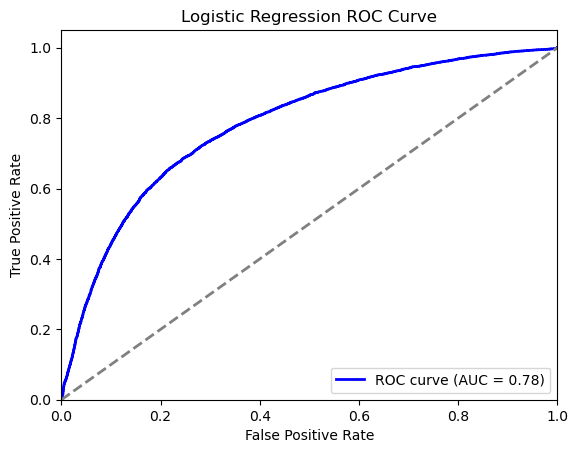

Confusion Matrix:
[[7943 2518]
 [3391 7148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000


Accuracy Score:
0.7186190476190476


In [13]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)  # Use probabilities here
roc_auc = roc_auc_score(y_test, y_pred1)          # Use probabilities here

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_class))

## 5.2 Random Forest Model

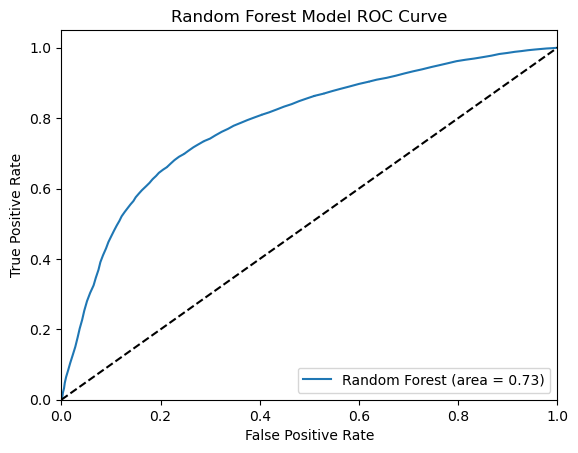

Accuracy Score: 0.7255238095238096
ROC AUC Score: 0.7839073544044086
Confusion Matrix:
 [[7777 2684]
 [3080 7459]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     10461
           1       0.74      0.71      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [14]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

# ROC-AUC
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Model ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred2))
print("ROC AUC Score:", roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))



# 5.3 ROC Curve for the SVM Model
The ROC curve helps us understand the trade-off between true positive and false positive rates.

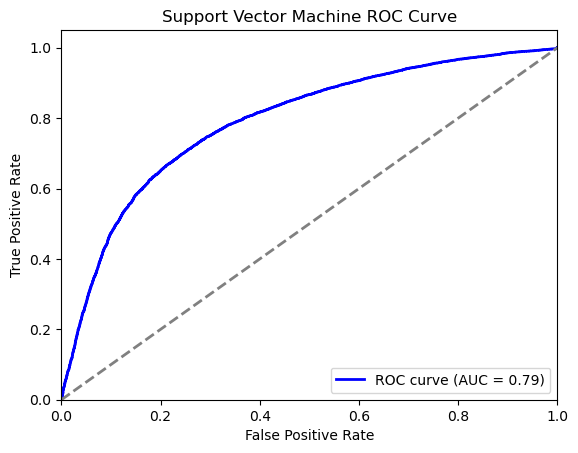


Confusion Matrix:
[[8441 2020]
 [3780 6759]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74     10461
           1       0.77      0.64      0.70     10539

    accuracy                           0.72     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.72      0.72     21000


Accuracy Score:
0.7238095238095238


In [15]:
# Predict using decision function to get decision scores
y_scores = svm_model.decision_function(X_test)

# Calculate ROC Curve using decision scores
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Predict on the test set for classification metrics
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))



# 5. 4 ROC Curve for the CNN Model

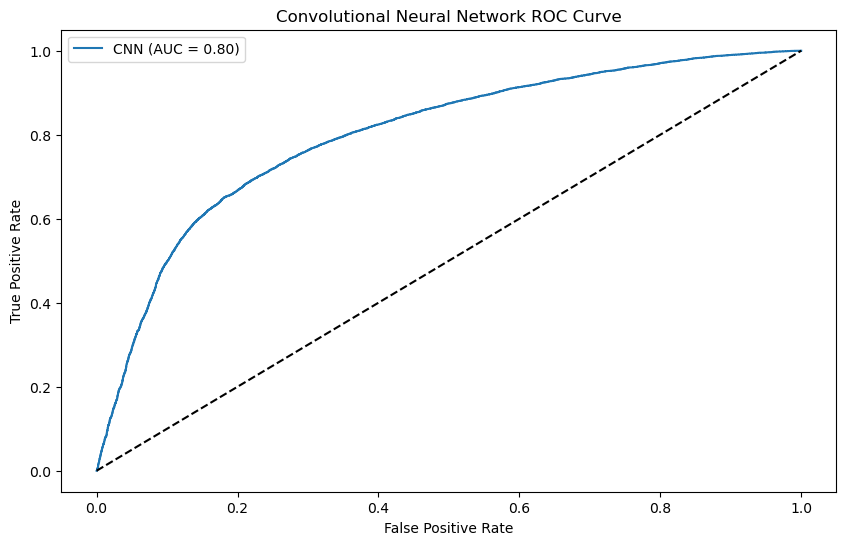

CNN Accuracy Score: 0.7350952380952381
CNN ROC AUC Score: 0.7996109724107849
CNN Confusion Matrix:
 [[8016 2445]
 [3118 7421]]
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74     10461
           1       0.75      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.73     21000
weighted avg       0.74      0.74      0.73     21000



In [16]:
# Plot ROC curve for CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_proba_cnn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn, label="CNN (AUC = {:.2f})".format(cnn_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Convolutional Neural Network ROC Curve")
plt.legend(loc="best")
plt.show()

# Print the results
print("CNN Accuracy Score:", cnn_accuracy)
print("CNN ROC AUC Score:", cnn_roc_auc)
print("CNN Confusion Matrix:\n", cnn_confusion_matrix)
print("CNN Classification Report:\n", cnn_classification_report)

# 6. Conclusion

## Summary Comparison
The Convolutional Neural Network (CNN) outperforms the other models in both AUC-ROC and accuracy, indicating superior capability in predicting heart disease. The SVM model shows competitive performance and could be preferred in scenarios where neural networks are not feasible. While the Logistic Regression offers good performance with the advantage of interpretability, useful for clinical settings where understanding feature impact is crucial. Random Forest is beneficial when dealing with complex and non-linear relationships but falls slightly behind in performance metrics.

Based on the models and their interpretations, individuals at high risk of developing heart disease typically share the following characteristics:

1. **Older Age:** Age is consistently identified as a strong predictor of heart disease across all models. As people age, the risk of developing heart disease increases significantly.
   
2. **High Systolic Blood Pressure:** Elevated systolic blood pressure is a key factor in heart disease risk. This is the pressure in your blood vessels when your heart beats.
**High Diastolic Blood Pressure:** Though not highlighted as strongly as systolic pressure, elevated diastolic pressure (the pressure in your blood vessels when your heart rests between beats) also contributes to risk.

3. **High Cholesterol:** Elevated cholesterol levels, particularly LDL (bad cholesterol), are a significant predictor of heart disease. High cholesterol can lead to the buildup of plaques in arteries, increasing the risk of heart attacks and strokes.
   
4. **High Body Weight/Obesity/BMI:** Excess body weight relative to height, particularly obesity, is another major risk factor. Higher weight is associated with increased blood pressure, cholesterol, and a higher likelihood of developing heart disease.

5. **Lifestyle Factors**
* ***Low Physical Activity:*** Lack of regular physical activity can contribute to the development of heart disease by exacerbating other risk factors like obesity, high blood pressure, and high cholesterol.
* ***Smoking:*** Smoking is a well-known risk factor for heart disease, as it damages the lining of the arteries and can lead to the buildup of plaques.
* ***Alcohol Consumption:*** Excessive alcohol consumption can increase blood pressure and contribute to heart disease risk.
* ***High Blood Glucose Levels:*** Individuals with high glucose levels, particularly those with diabetes, are at higher risk for heart disease due to the damage high blood sugar can cause to blood vessels.

## Conclusion

To conclude, individuals who are older, have high blood pressure, high cholesterol, are overweight or obese, and have unhealthy lifestyle habits like smoking, excessive alcohol consumption, and low physical activity are at the highest risk of developing heart disease. These factors should be closely monitored and managed to reduce the risk of heart disease, and targeted interventions should be considered for those at high risk. By understanding which factors are most important, personalized treatment plans can be developed that address the highest-risk features for each patient.


# End of the Report
